In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import glob

In [3]:
file_pattern = "C:/Users/vbodavul/Downloads/archive (2)/202[23]*-divvy-tripdata.csv"

In [4]:
file_list = glob.glob(file_pattern)

In [5]:
file_list


['C:/Users/vbodavul/Downloads/archive (2)\\202205-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202206-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202207-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202208-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202210-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202211-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202212-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202301-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202302-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202303-divvy-tripdata.csv',
 'C:/Users/vbodavul/Downloads/archive (2)\\202304-divvy-tripdata.csv']

In [6]:
df = pd.concat((pd.read_csv(file) for file in file_list))

In [7]:
df.count()

ride_id               5157722
rideable_type         5157722
started_at            5157722
ended_at              5157722
start_station_name    4429493
start_station_id      4429361
end_station_name      4379246
end_station_id        4379105
start_lat             5157722
start_lng             5157722
end_lat               5152461
end_lng               5152461
member_casual         5157722
dtype: int64

In [8]:
print(df.count())

ride_id               5157722
rideable_type         5157722
started_at            5157722
ended_at              5157722
start_station_name    4429493
start_station_id      4429361
end_station_name      4379246
end_station_id        4379105
start_lat             5157722
start_lng             5157722
end_lat               5152461
end_lng               5152461
member_casual         5157722
dtype: int64


In [9]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.drop_duplicates(inplace=True)

In [10]:
df.to_csv('C:/Users/vbodavul/Downloads/archive (2)/merged_and_cleaned_tripdata.csv', index=False)

In [11]:
# Function to calculate distance between two points using the Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [12]:
# Apply the function to calculate distances
df['distance_km'] = df.apply(lambda x: haversine_distance(x['start_lat'], x['start_lng'], x['end_lat'], x['end_lng']), axis=1)


## Finding the total average distance travelled

In [13]:
# Calculate the average distance
average_distance_km = df['distance_km'].mean()

In [14]:
# Find the most common start location
most_common_start_location = df['start_station_name'].mode()[0]

In [15]:
# You can print these out or use them as needed
print(f"Average distance traveled: {average_distance_km} km")
print(f"Most common start location: {most_common_start_location}")

Average distance traveled: 2.1111928089656637 km
Most common start location: Streeter Dr & Grand Ave


## Finding month with maximum distance travelled

In [16]:
# Extract the month from the 'started_at' column
df['month'] = df['started_at'].dt.month

In [17]:
# Count the occurrences of each month and find the month with the highest number of rides
most_preferred_month = df['month'].value_counts().idxmax()


In [18]:
# Translate the numeric month to a month name for readability (optional)
import calendar
most_preferred_month_name = calendar.month_name[most_preferred_month]

print(f"The most preferred month for bicycle riding is: {most_preferred_month_name}")

The most preferred month for bicycle riding is: July


## Maximum distance travelled in a month

In [19]:

# Sum the distances for each month
monthly_distance_sum = df.groupby('month')['distance_km'].sum()

# Find the month with the highest total distance
most_distance_month = monthly_distance_sum.idxmax()

# Translate the numeric month to a month name for readability (optional)
most_distance_month_name = calendar.month_name[most_distance_month]

print(f"The month with the most distance traveled is: {most_distance_month_name} with a total distance of {monthly_distance_sum.max()} kilometers.")

The month with the most distance traveled is: July with a total distance of 1841373.1294548644 kilometers.


In [19]:

# Sum the distances for each month
monthly_distance_sum = df.groupby('month')['distance_km'].sum()

# Find the month with the highest total distance
most_distance_month = monthly_distance_sum.idxmax()

# Translate the numeric month to a month name for readability (optional)
most_distance_month_name = calendar.month_name[most_distance_month]

print(f"The month with the most distance traveled is: {most_distance_month_name} with a total distance of {monthly_distance_sum.max()} kilometers.")

The month with the most distance traveled is: July with a total distance of 1841373.1294548644 kilometers.


## Monthwise Usage Trends

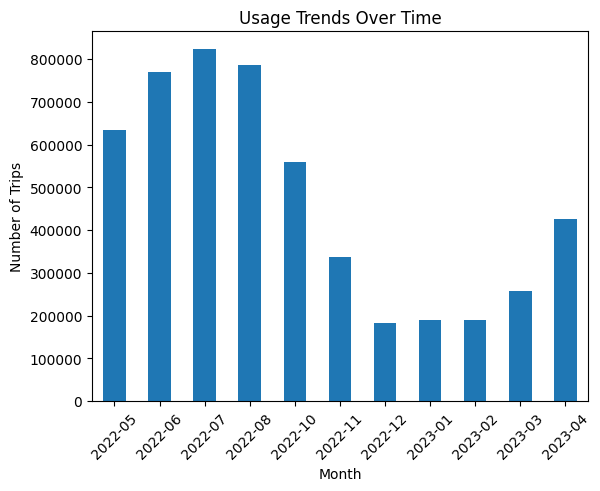

In [24]:
# Monthwise usage trends
# Extract month (or other desired time period) for grouping
df['month'] = df['started_at'].dt.to_period('M')

# Count trips by month
usage_trends = df.groupby('month').size()a

# Plot
usage_trends.plot(kind='bar')
plt.title('Usage Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


## Finding Average Trip Duration and Distance

In [26]:

# Calculate duration in minutes
df['duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Average duration
average_duration = df['duration_minutes'].mean()

# Calculate distances based on start and end coordinates,
def calculate_distance(row):
    return np.nan  # Replace with actual distance calculation

df['distance_km'] = df.apply(calculate_distance, axis=1)

# Average distance
average_distance = df['distance_km'].mean()

print(f'Average Trip Duration: {average_duration} minutes')
print(f'Average Trip Distance: {average_distance} km')


Average Trip Duration: 18.88451384803862 minutes
Average Trip Distance: nan km


## Popular Areas for Start and End Points

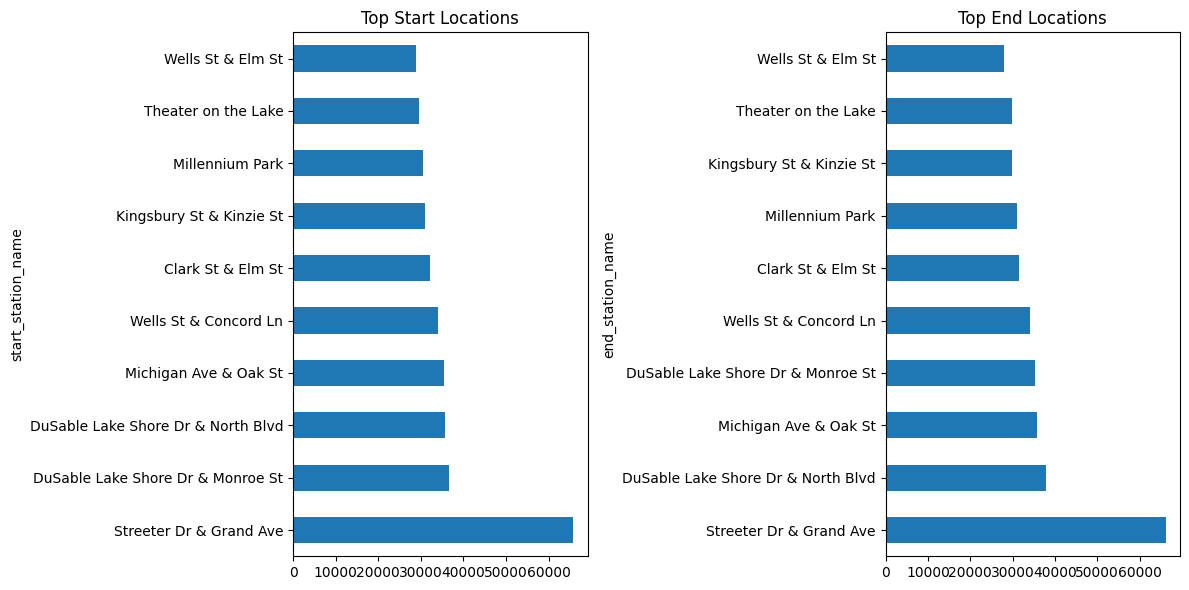

In [27]:
# Top start locations
top_starts = df['start_station_name'].value_counts().head(10)

# Top end locations
top_ends = df['end_station_name'].value_counts().head(10)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
top_starts.plot(kind='barh', ax=axes[0], title='Top Start Locations')
top_ends.plot(kind='barh', ax=axes[1], title='Top End Locations')
plt.tight_layout()
plt.show()


## Operational Insights

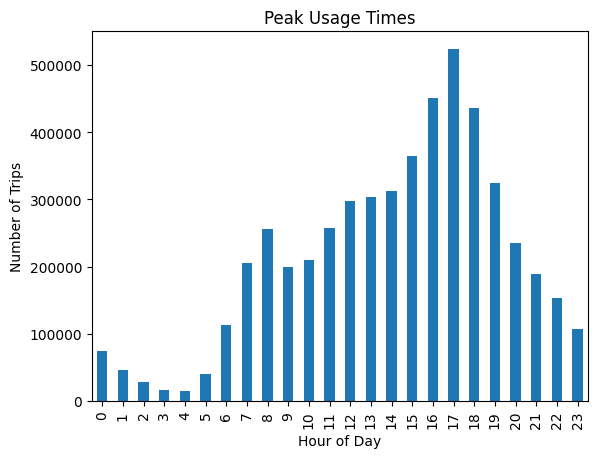

In [30]:
# Identify peak usage times
df['hour'] = df['started_at'].dt.hour
peak_usage = df.groupby('hour').size()

# Plot
peak_usage.plot(kind='bar')
plt.title('Peak Usage Times')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()
